# download dataset in colab
dataset link (https://www.kaggle.com/crawford/emnist#emnist-balanced-mapping.txt)

#Description 
The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. Further information on the dataset contents and conversion process can be found in the paper available at https://arxiv.org/abs/1702.05373v1.

# format
There are six different splits provided in this dataset and each are provided in two formats:

Binary (see emnist_source_files.zip)
CSV (combined labels and images)
Each row is a separate image
785 columns
First column = class_label (see mappings.txt for class label definitions)
Each column after represents one pixel value (784 total for a 28 x 28 image)


In [1]:
!pip install kaggle

In [2]:

!mkdir /root/.kaggle
!ls -f /root/

.bashrc  .	   .local   .keras    .node-gyp  .npm	   .config
..	 .profile  .kaggle  .ipython  .cache	 .jupyter  .gsutil


In [5]:
!kaggle datasets download -d crawford/emnist

100% 1.24G/1.24G [00:16<00:00, 104MB/s] 
100% 1.24G/1.24G [00:16<00:00, 80.6MB/s]


In [0]:
!cp   kaggle.json /root/.kaggle/kaggle.json

In [0]:
#!ls  /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
! mkdir  /content/data/

In [7]:
!unzip /content/emnist.zip -d /content/data/

Archive:  /content/emnist.zip
  inflating: /content/data/emnist-digits-mapping.txt  
  inflating: /content/data/emnist-balanced-mapping.txt  
  inflating: /content/data/emnist-letters-test.csv  
  inflating: /content/data/emnist-bymerge-test.csv  
  inflating: /content/data/emnist-letters-train.csv  
  inflating: /content/data/emnist-mnist-train.csv  
  inflating: /content/data/emnist-letters-mapping.txt  
  inflating: /content/data/emnist-byclass-test.csv  
  inflating: /content/data/emnist-byclass-mapping.txt  
  inflating: /content/data/emnist-bymerge-mapping.txt  
  inflating: /content/data/emnist-digits-train.csv  
  inflating: /content/data/emnist-bymerge-train.csv  
  inflating: /content/data/emnist_source_files.zip  
  inflating: /content/data/emnist-mnist-test.csv  
  inflating: /content/data/emnist-byclass-train.csv  
  inflating: /content/data/emnist-mnist-mapping.txt  
  inflating: /content/data/emnist-balanced-train.csv  
  inflating: /content/data/emnist-balanced-test.csv

#Exploring the Data

In [0]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


In [9]:

train=pd.read_csv('data/emnist-balanced-train.csv',header=None)
test=pd.read_csv('data/emnist-balanced-test.csv',header=None)
print('trainData : ')
train.head()

trainData : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# prepare the Data

In [10]:
train_data=train.iloc[:100000,1:]
train_label=train.iloc[:100000,0]
vaild_data=train.iloc[100000:,1:]
vaild_label=train.iloc[100000:,0]
test_data=test.iloc[:,1:]
test_label=test.iloc[:,0]

print('trainData : ',train_data.shape[0],' validData  : ',vaild_data.shape[0],' testData : ',test_data.shape[0])

trainData :  100000  validData  :  12800  testData :  18800


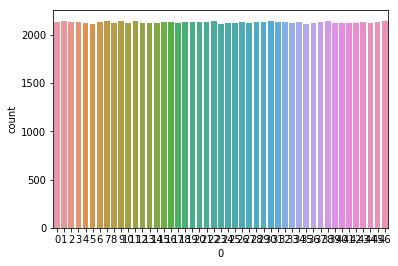

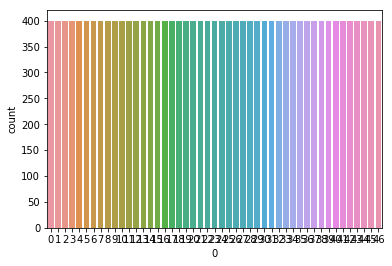

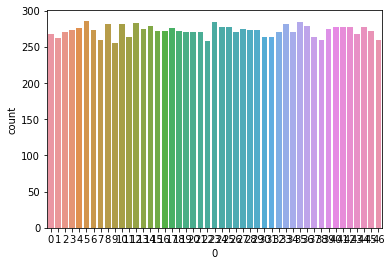

In [11]:
# data.sample(10)

#list(data.columns)

# x=data.iloc[[2]]
# print(x)
# data.iloc[:,1:]

import seaborn as sns
# lab = train_label.iloc[:]
# dist = lab.value_counts()
sns.countplot(train_label.iloc[:])
# %matplotlib inline
plt.show()

sns.countplot(test_label.iloc[:])
plt.show()
sns.countplot(vaild_label.iloc[:])
plt.show()
# print(dict_characters)

In [12]:
train_label = pd.get_dummies(train_label)
test_label = pd.get_dummies(test_label)
vaild_label=pd.get_dummies(vaild_label)
train_label.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_data=train_data.values
train_label=train_label.values
vaild_data=vaild_data.values
vaild_label=vaild_label.values
test_data=test_data.values
test_label=test_label.values


del train ,test


In [0]:

def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    
    
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
vaild_data=np.apply_along_axis(rotate,1,vaild_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255

In [15]:
test_data=test_data.reshape([test_data.shape[0],28,28,1])
train_data=train_data.reshape([train_data.shape[0],28,28,1])
vaild_data=vaild_data.reshape([vaild_data.shape[0],28,28,1])
print(test_data.shape)
print(train_data.shape)
print(vaild_data.shape)
print(len(test_data))

(18800, 28, 28, 1)
(100000, 28, 28, 1)
(12800, 28, 28, 1)
18800


In [0]:
def processing_img(img):
    img=img.reshape([28 , 28])
    img=np.round(img)
    img=img.reshape([28,28,1])
    return img

def processing_imgs(imgs):
    list_of_imgs=[processing_img(img) for img in imgs]
    return list_of_imgs
    

In [0]:
trainP_data = np.asarray(processing_imgs(train_data))
vaildP_data=np.asarray(processing_imgs(vaild_data))
testP_data = np.asarray(processing_imgs(test_data))

the character is :  I


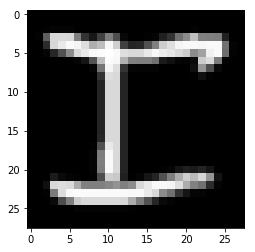

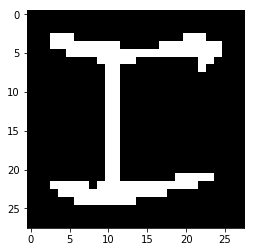

In [22]:
import matplotlib.pyplot as plt
# % matplotlib inline
# print(train_data[25].reshape([28,28]))
print("the character is : " ,mappings[np.argmax(train_label[1005])])
plt.imshow(train_data[1005].reshape([28, 28]),cmap='gray')
plt.show()
plt.imshow(trainP_data[1005].reshape([28, 28]),cmap='gray')
plt.show()

# list = random.sample(range(29000), 15)
# for i in list:
#     print(".......   label : ",train_label[i])
#     plt.imshow(train_data[i].reshape([28, 28]), cmap='Greys_r')
#     plt.show()

In [23]:
print(train_data.shape)
print(trainP_data.shape)

(100000, 28, 28, 1)
(100000, 28, 28, 1)


# CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=1))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(47, activation='softmax')) 

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [0]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
!mkdir /content/saved_models
! mv weights.best.CNN.hdf5 /content/saved_models

In [0]:
from keras.callbacks import ModelCheckpoint 
epochs = 10


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.CNN.hdf5', 
                               verbose=1, save_best_only=True)

cnn_model.fit(trainP_data, train_label, validation_data=(vaildP_data, vaild_label), epochs=epochs,callbacks=[checkpointer],
          batch_size=20, verbose=1)

Train on 100000 samples, validate on 12800 samples
Epoch 1/10
100000/100000 [==============================] - 321s 3ms/step - loss: 0.7227 - acc: 0.7660 - val_loss: 0.4508 - val_acc: 0.8404

Epoch 00001: val_loss improved from inf to 0.45077, saving model to saved_models/weights.best.CNN.hdf5
Epoch 2/10
100000/100000 [==============================] - 321s 3ms/step - loss: 0.4932 - acc: 0.8309 - val_loss: 0.3924 - val_acc: 0.8563

Epoch 00002: val_loss improved from 0.45077 to 0.39237, saving model to saved_models/weights.best.CNN.hdf5
Epoch 3/10
100000/100000 [==============================] - 325s 3ms/step - loss: 0.4377 - acc: 0.8449 - val_loss: 0.3766 - val_acc: 0.8633

Epoch 00003: val_loss improved from 0.39237 to 0.37659, saving model to saved_models/weights.best.CNN.hdf5
Epoch 4/10
100000/100000 [==============================] - 320s 3ms/step - loss: 0.4053 - acc: 0.8548 - val_loss: 0.3730 - val_acc: 0.8606

Epoch 00004: val_loss improved from 0.37659 to 0.37298, saving model

In [0]:
cnn_model.load_weights('saved_models/weights.best.CNN.hdf5')

In [0]:
score = cnn_model.evaluate(testP_data, test_label, verbose=0)
accuracy = 100*score[1]
# accuracy_values['CNN'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5000%


In [0]:
 mappings = []
def load_char_mappings(mapping_path):
    """
    load EMNIST character mappings. This maps a label to the correspondent byte value of the given character
    return: the dictionary of label mappings
    """
#     mappings = []
    with open(mapping_path) as f:
        for line in f:
            (key, val) = line.split()
            temp= chr(int(val))
            mappings.append(temp)

    return mappings

In [20]:
 mappings


[]

In [0]:
mappings=load_char_mappings('data/emnist-balanced-mapping.txt')

# preprocessing for input image 

In [24]:
from PIL import Image
from keras.preprocessing import image                  
from tqdm import tqdm
import cv2
# from keras.preprocessing import image
def preprocessing(img_path):
#     img2=cv2.imread(img_path)
#     print(np.max(img2))
# #     print(img2)
#     plt.imshow(img2)
#     plt.show()
    img=cv2.imread(img_path,0) # RGB to gray
#     print(np.max(img))
#     print(img)
    print("from read..")
    plt.imshow(img,cmap='gray')
    plt.show()
    img= cv2.resize(img, (28, 28))
#     img=img.reshape(1,28,28,1)

    
    kernel = np.ones((2,2),np.uint8)
#     print(np.max(img))
    print("from resize..")
    plt.imshow(img,cmap='gray')
    plt.show()
#     print(np.max(img.reshape([28,28,1])))
    retval, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY) # gray to binary
    imgB=img
#     print(img.shape)
    print("from gray to binary..")
    plt.imshow(img,cmap='gray')
    plt.show()
    img = cv2.Canny(img,2,2) # edge dectiction
#     print(img.shape)
    print("from edge detection..")
    plt.imshow(img,cmap='gray')
    plt.show()
#     img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel) # morpholgy
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#     img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#     img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#     print(img.shape)
    print("from morpholgy..")
    plt.imshow(img,cmap='gray')
    plt.show()
    
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
 
    # Floodfill from point (0, 0)
    cv2.floodFill(img, mask, (0,0), 255);
 
    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(img)
 
    # Combine the two images to get the foreground.
    im_out = imgB | im_floodfill_inv
    print(im_out.shape)
    plt.imshow(im_out/255,cmap='gray')
    plt.show()
#     kernel = np.ones((3, 3), np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     cv2.imshow('image',img)
#     img=img[:,:,0].reshape(1,28,28,1)
#     print(img.reshape([28,28]))
#     img=image.img_to_array(img)
    im_out=im_out.reshape([1,28,28,1])
    #return im_out/255
#     print(im_out.shape)
#     img = image.load_img(img_path, target_size=(28, 28))
#     x = image.img_to_array(img)
#     print(x.shape)
# #     x=x[:,:].reshape(1,28,28,1)
# #     img=plt.imread(img_path)
# #     img=np.asarray(img)
#     plt.imshow(x.reshape([28, 28]))
#     plt.show()
#     print(x.shape)



Using TensorFlow backend.


from read..


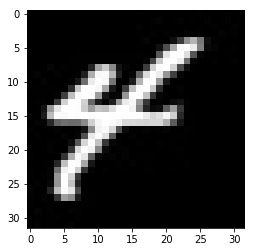

from resize..


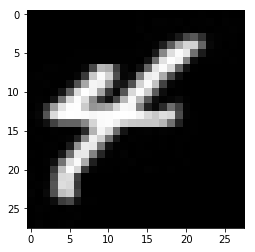

from gray to binary..


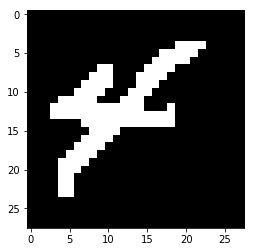

from edge detection..


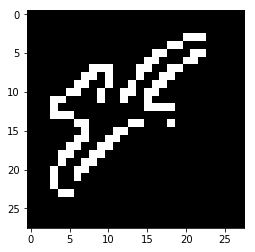

from morpholgy..


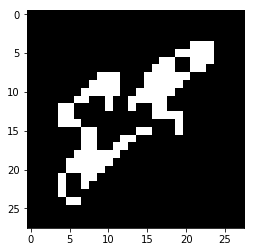

(28, 28)


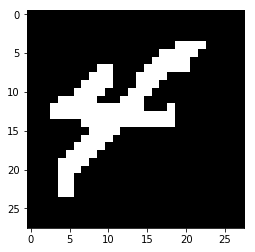

In [25]:
preprocessing('2.jpg')

In [0]:
def cnn_predict(img_path):
#     predict_vec=cnn_model.predict(path_imgto_tensor(img_path))
    #print(predict_vec)
    predict_vec=cnn_model.predict(preprocessing(img_path))
    print(predict_vec)
    return mappings[np.argmax(predict_vec)]

In [0]:
def OCR_detect(img_path):
    plt.imshow(plt.imread(img_path))
    plt.show()
    print('that sing mean .....')
    
    print('using CNN .............' ,cnn_predict(img_path))
#     print('using CNN Augmented....',cnn_Aug_predict(img_path))

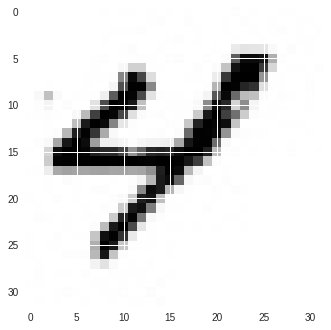

that sing mean .....
(28, 28)


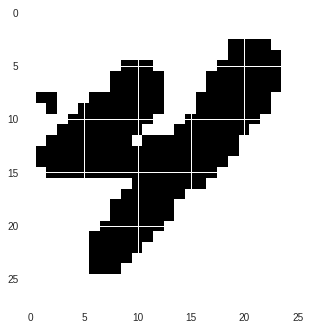

[[8.17706569e-10 2.37252991e-07 3.02800141e-09 5.41774334e-11
  9.94342685e-01 3.78206660e-10 5.92310164e-13 2.04859625e-05
  6.00548873e-08 6.51428272e-05 8.37889047e-09 5.13481965e-11
  2.16894992e-12 1.14285706e-10 1.28174457e-10 2.13196728e-07
  6.07198680e-10 6.54572796e-06 4.60541152e-08 5.11219245e-09
  3.71840614e-10 6.75213698e-07 1.66111818e-08 9.42570910e-09
  2.60130806e-10 1.71751040e-07 4.86253748e-09 4.17331100e-12
  1.12628962e-10 7.81402321e-07 5.78609516e-08 3.70902467e-06
  3.89497103e-07 1.44999277e-07 5.37264906e-03 3.78221472e-08
  3.61656483e-09 2.33523784e-10 2.92880586e-09 4.08876666e-09
  2.70586014e-07 4.23951460e-05 3.71984422e-11 5.35195488e-09
  8.56843399e-05 2.41954035e-09 5.75106060e-05]]
using CNN ............. 4


In [0]:
immg='3.jpg'
OCR_detect(immg)